Updated: 20/02/24

This workbook looks at the mixing between various m=0 modes and determines the best fit for the (2,0) mode,

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfitsrd as qnmfits
from multiprocessing import Pool
from spatial_reconstruction import *
import matplotlib.pyplot as plt
from qnmfitsrd.CCE_file_getter import *

### What does the mixing look like for m=0?

In [37]:
l_max = 8
n_max = 1

sim1 = CCE_to_sim_high_res(sim_num='0001')
sim2 = CCE_to_sim_high_res(sim_num='0010')

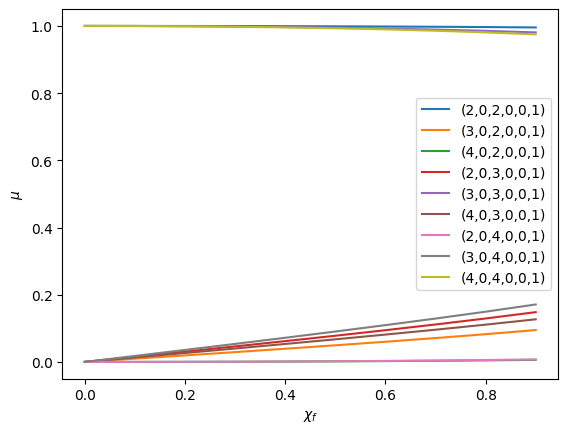

In [31]:
qnms = [(l,0,0,1) for l in range(2,l_max+1)]
spherical_modes = [(l,0) for l in range(2,l_max+1)]
chifs = np.arange(0,1,0.1)

fig, ax = plt.subplots(1,1)

for qnm in qnms:
    for spherical_mode in spherical_modes:
        mus = [] 
        for chif in chifs:
            lp, mp = spherical_mode
            l, m, n, p = qnm
            mu = qnmfits.qnm.mu(lp, mp, l, m, n, p, chif.copy())
            mus.append(mu)
        ax.plot(chifs, np.abs(mus), label=f'({lp},{mp},{l},{m},{n},{p})')

ax.set_xlabel(r'$\chi_f$')
ax.set_ylabel(r'$\mu$')
ax.legend()
plt.show()

TypeError: 'Axes' object is not subscriptable

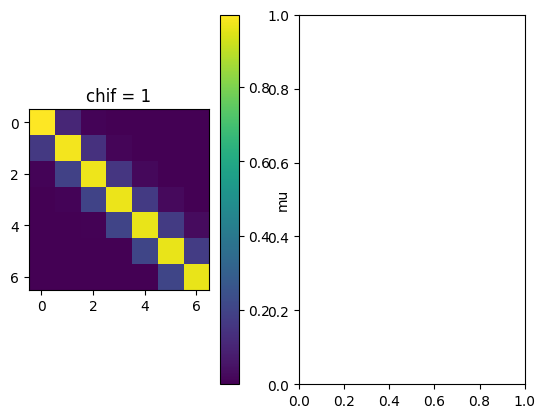

In [46]:
qnms = [(l,0,0,1) for l in range(2,l_max+1)]
spherical_modes = [(l,0) for l in range(2,l_max+1)]
mus = np.zeros((len(qnms), len(spherical_modes)))
chif = 1 

# Calculate the values of mu
for i, qnm in enumerate(qnms):
    for j, spherical_mode in enumerate(spherical_modes):
        lp, mp = spherical_mode
        l, m, n, p = qnm
        mu = qnmfits.qnm.mu(lp, mp, l, m, n, p, chif)
        mus[i, j] = np.abs(mu)

# Plot the heatmap
fig, axs = plt.subplots(1, 2)

im1 = axs[0].imshow(mus, cmap='viridis')
cbar1 = axs[0].figure.colorbar(im1, ax=axs[0])
cbar1.set_label('mu')
axs[0].set_title(f'chif = {chif}')

im2 = axs[1].imshow(np.log(mus), cmap='viridis')
cbar2 = axs[1].figure.colorbar(im1, ax=axs[1])
cbar2.set_label('mu (log)')
axs[1].set_title(f'chif = {chif}')

for i, ax in enumerate(axes):
    im = ax.imshow(mus, cmap='viridis')

    # Set the tick labels
    ax.set_xticks(np.arange(len(spherical_modes)))
    ax.set_yticks(np.arange(len(qnms)))
    ax.set_xticklabels([f'({l},0)' for l in range(2, l_max+1)])
    ax.set_yticklabels([f'({l},{m},{n},{p})' for l, m, n, p in qnms])

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Set the labels and title
    ax.set_xlabel('Spherical Modes')
    ax.set_ylabel('QNMs')

# Show the plot
plt.show()

cbar.set_label('mu')
plt.title(f'chif = {chif}')

# Show the plot
plt.show()


In [41]:
print(abs(qnmfits.qnm.mu(2, 0, 8, 0, 0, 1, chif)))

2.5715053998180175e-06
